<table style="width: 100%; font-size: 26px; direction: rtl;">
  <tr>
    <td style="text-align: right;">نور الدين امجد عبد الفتاح احمد محمد علوه</td>
    <td style="text-align: left;">ID: 23011596</td>
  </tr>
  <tr>
    <td style="text-align: right;">علي ابوبكر كمال محمود </td>
    <td style="text-align: left;">ID: 23012267</td>
  </tr>
  <tr>
    <td style="text-align: right;">عبد الله نجاح محمد حسن</td>
    <td style="text-align: left;">ID: 23011356</td>
  </tr>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Regression Models

## 1.1 Exploratory Data Analysis 

[Data link](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [2]:
df = pd.read_csv('Housing.csv') # reading the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe() # general statistics

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isna().sum() # cheaking for any NAN values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.isnull().sum() # cheaking for any Null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

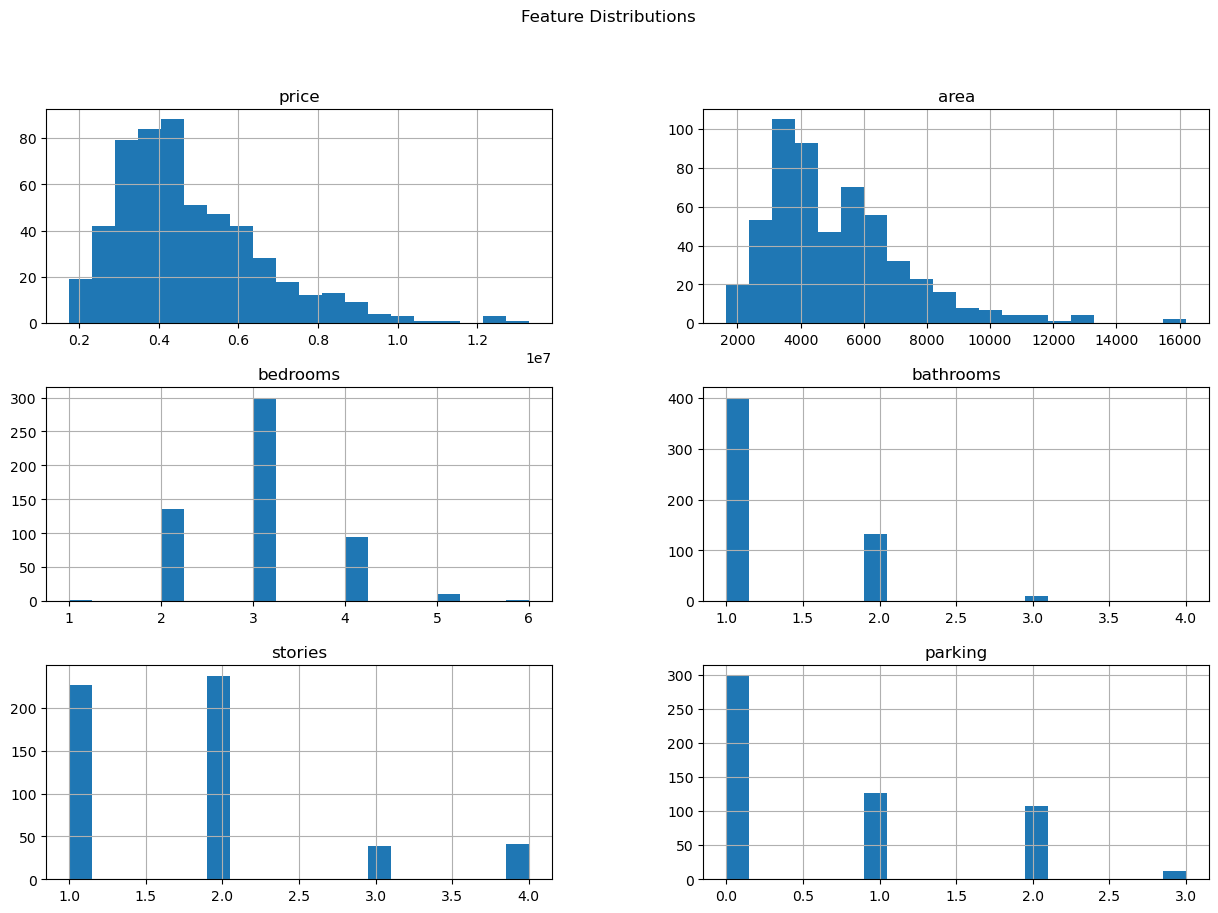

In [8]:
# ploting the distribution for the features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

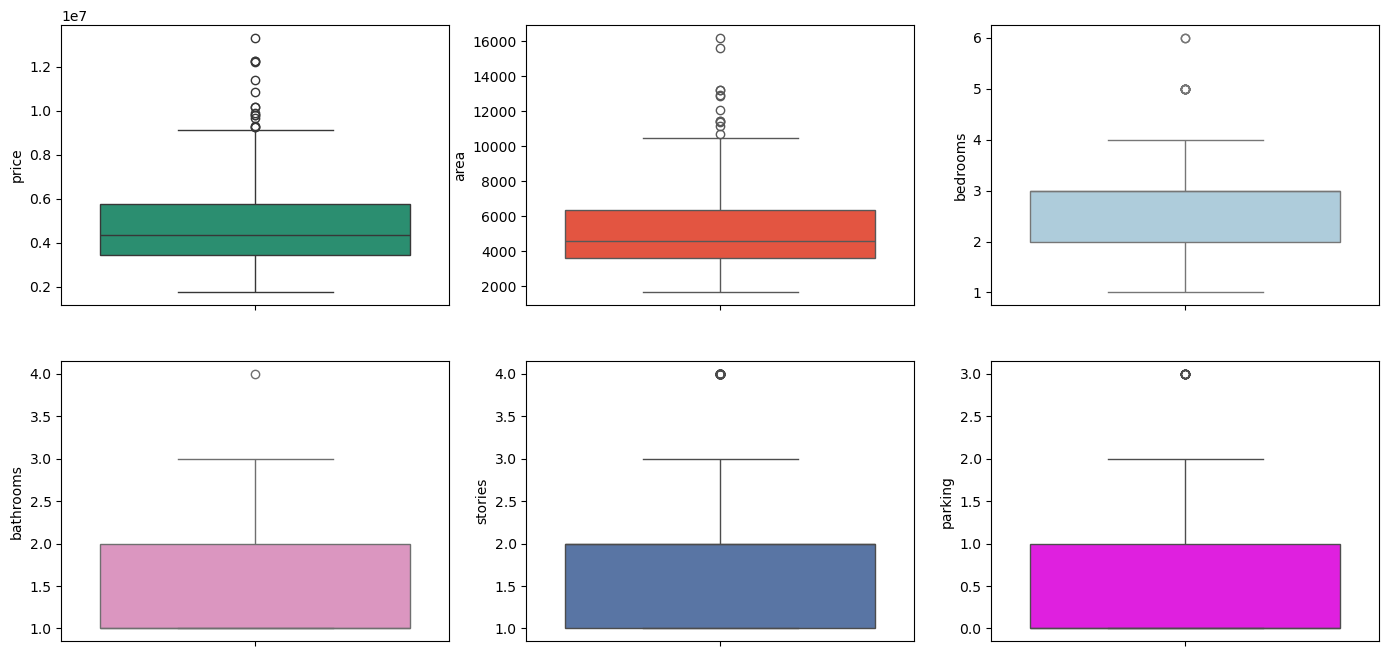

In [9]:
# ploting outliers for the data
fig, axes = plt.subplots(2, 3, figsize = (17, 8))
plt_price = sns.boxplot(df["price"], ax = axes[0,0], palette='Dark2')
plt_area = sns.boxplot(df["area"], ax = axes[0,1], palette='CMRmap')
plt_bedrooms = sns.boxplot(df["bedrooms"], ax = axes[0,2], palette='Paired')
plt_bathrooms = sns.boxplot(df["bathrooms"], ax = axes[1,0], color='#e78ac3')
plt_stories = sns.boxplot(df["stories"], ax = axes[1,1], palette = 'deep')
plt_parking = sns.boxplot(df["parking"], ax = axes[1, 2], color='#ff00ff')
plt.show()

![IQR formula](https://miro.medium.com/v2/resize:fit:1400/1*0MPDTLn8KoLApoFvI0P2vQ.png)

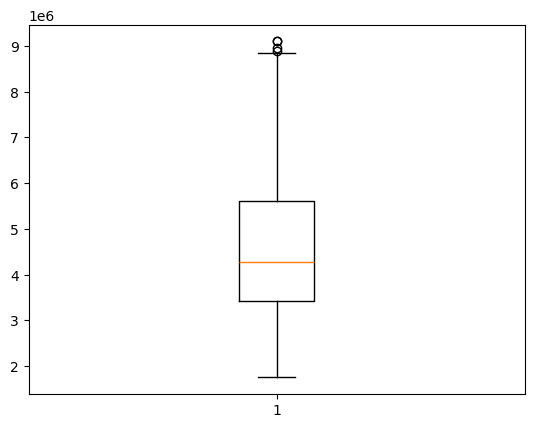

In [10]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x258d64fef20>,
 'caps': [<matplotlib.lines.Line2D at 0x258d64ff550>,
 'boxes': [<matplotlib.lines.Line2D at 0x258d64fec20>],
 'medians': [<matplotlib.lines.Line2D at 0x258d64ffb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x258d64ffe50>],
 'means': []}

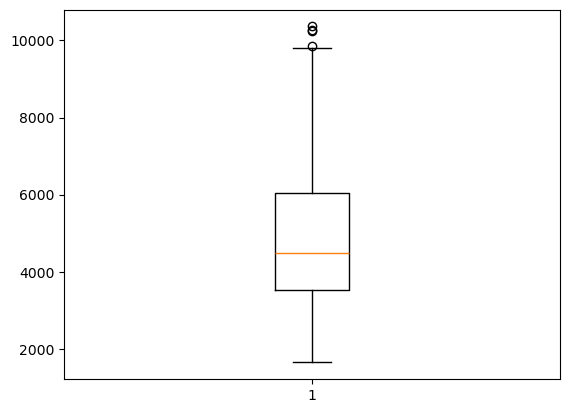

In [11]:
# Dealing with outliers in area 
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

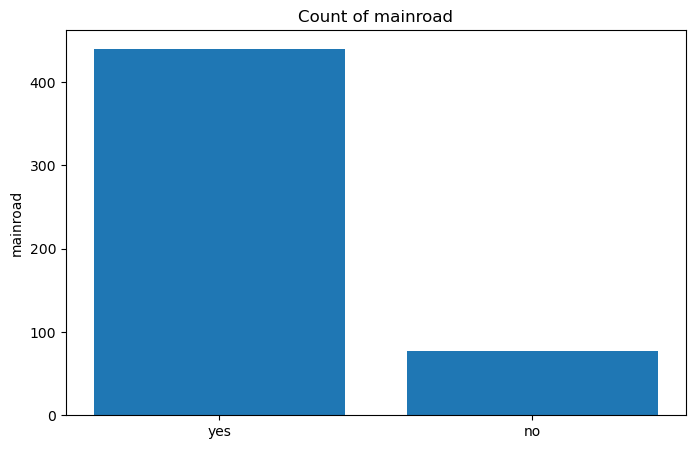

In [12]:
mainroad_counts = df["mainroad"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(mainroad_counts.index, mainroad_counts)
plt.title("Count of mainroad")
plt.ylabel("mainroad")
plt.show()

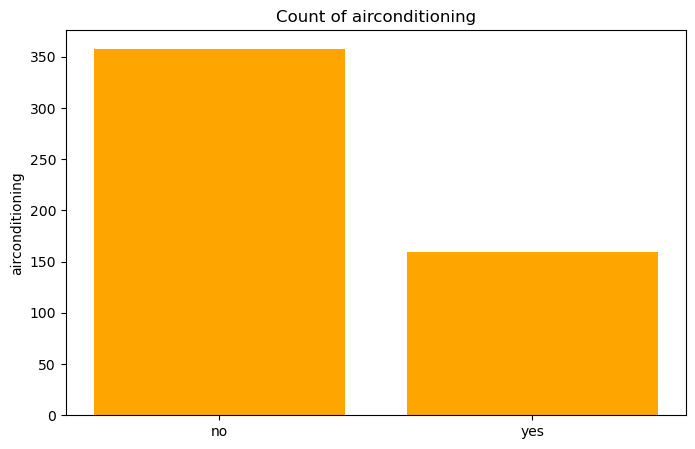

In [13]:
mainroad_counts = df["airconditioning"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(mainroad_counts.index, mainroad_counts, color = 'orange')
plt.title("Count of airconditioning")
plt.ylabel("airconditioning")
plt.show()

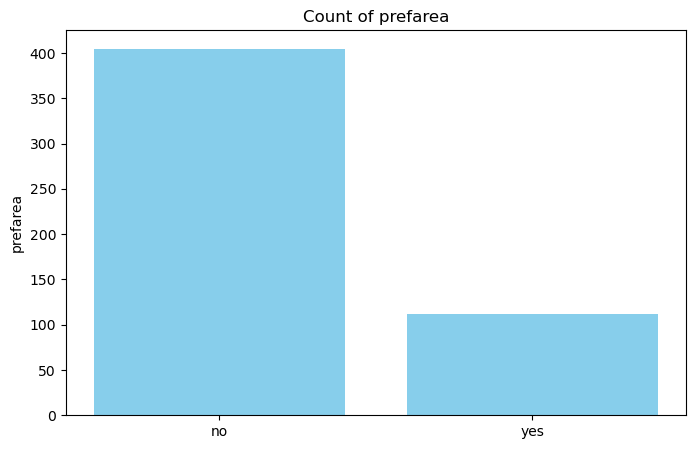

In [14]:
prefarea_counts = df["prefarea"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(prefarea_counts.index, prefarea_counts, color = 'skyblue')
plt.title("Count of prefarea")
plt.ylabel("prefarea")
plt.show()

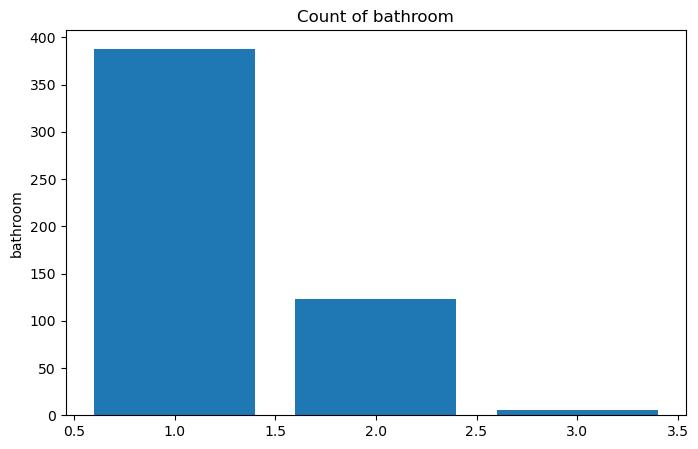

In [15]:
bathroom_counts = df["bathrooms"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(bathroom_counts.index, bathroom_counts, color = '#1f77b4')
plt.title("Count of bathroom")
plt.ylabel("bathroom")
plt.show()

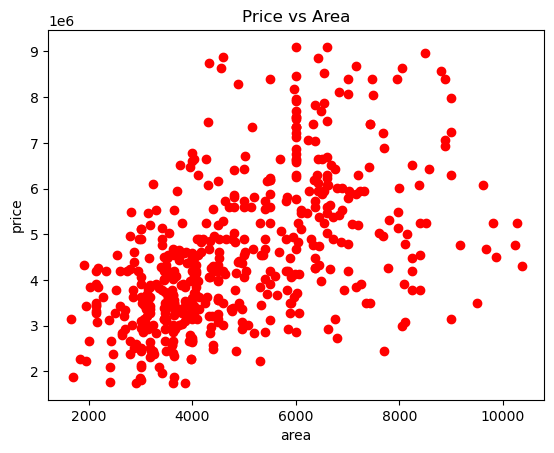

In [16]:
plt.scatter(df["area"], df["price"], color = 'red')
plt.title("Price vs Area")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

## 1.2 Preprocessing

![OneHotEncoding example](https://miro.medium.com/v2/resize:fit:1200/0*T5jaa2othYfXZX9W.)

In [18]:
#converting categorical feature to numeric values using One Hot Encoding

cat_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "furnishingstatus", "airconditioning", "prefarea"]

encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

encoded_df = encoder.fit_transform(df[cat_cols])

df = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
15,9100000,6000,4,1,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16,9100000,6600,4,2,2,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
17,8960000,8500,3,2,4,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
18,8890000,4600,3,2,2,2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19,8855000,6420,3,2,2,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


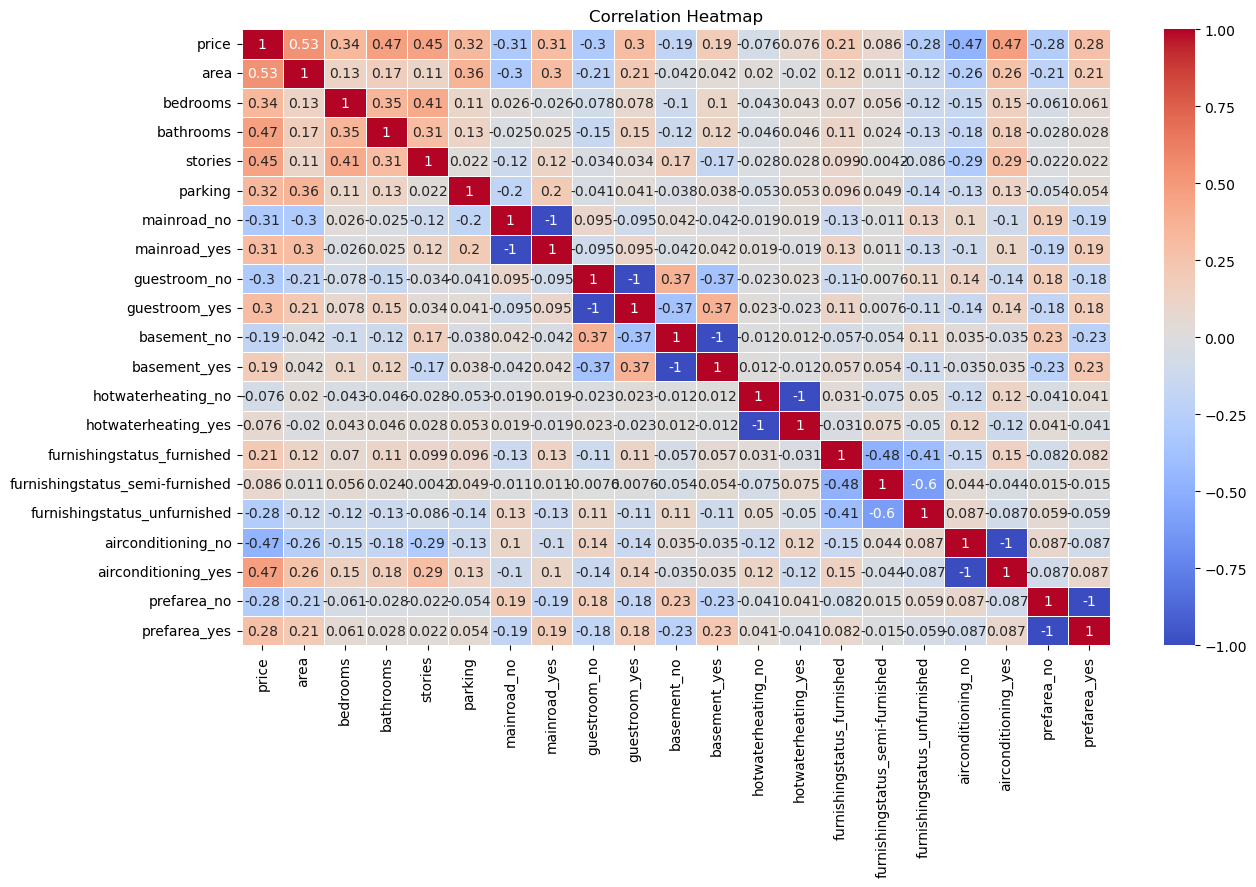

In [19]:
cor_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,-0.296898,0.296898,-0.255517,0.255517,...,0.187057,-0.093073,0.093073,0.229350,0.063656,-0.280587,-0.452954,0.452954,-0.329777,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,-0.288874,0.288874,-0.140297,0.140297,...,0.047417,0.009229,-0.009229,0.145772,0.006156,-0.142278,-0.222393,0.222393,-0.234779,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,-0.012033,-0.080549,0.080549,...,0.097312,-0.046049,0.046049,0.079054,0.050040,-0.126252,-0.160603,0.160603,-0.079023,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,-0.042398,0.042398,-0.126469,0.126469,...,0.102106,-0.067159,0.067159,0.108139,0.029834,-0.132107,-0.186915,0.186915,-0.063472,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.121706,0.121706,-0.043538,0.043538,...,-0.172394,-0.018847,0.018847,0.093176,-0.003648,-0.082972,-0.293602,0.293602,-0.044425,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,-0.204433,0.204433,-0.037466,0.037466,...,0.051497,-0.067864,0.067864,0.131234,0.041327,-0.165705,-0.159173,0.159173,-0.091627,0.091627
mainroad_no,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,-0.204433,1.000000,-1.000000,0.092337,-0.092337,...,-0.044002,-0.011781,0.011781,-0.129971,-0.011450,0.133123,0.105423,-0.105423,0.199876,-0.199876
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,-1.000000,1.000000,-0.092337,0.092337,...,0.044002,0.011781,-0.011781,0.129971,0.011450,-0.133123,-0.105423,0.105423,-0.199876,0.199876
guestroom_no,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,-0.037466,0.092337,-0.092337,1.000000,-1.000000,...,-0.372066,-0.010308,0.010308,-0.099721,-0.005821,0.099023,0.138179,-0.138179,0.160897,-0.160897
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,-0.092337,0.092337,-1.000000,1.000000,...,0.372066,0.010308,-0.010308,0.099721,0.005821,-0.099023,-0.138179,0.138179,-0.160897,0.160897


In [20]:
#from the correlation heat map we see that area, bedrooms , bathrooms, stories, parking, airconditioning and prefarea(preferred area) 
#got high correlation with price

df = df[["price", "area", "prefarea_yes", "prefarea_no", "airconditioning_yes", "airconditioning_no", "bedrooms", "bathrooms", "stories", "parking"]]

In [21]:
df.head()

,price,area,prefarea_yes,prefarea_no,airconditioning_yes,airconditioning_no,bedrooms,bathrooms,stories,parking
15,9100000,6000,0.0,1.0,0.0,1.0,4,1,2,2
16,9100000,6600,1.0,0.0,1.0,0.0,4,2,2,1
17,8960000,8500,0.0,1.0,1.0,0.0,3,2,4,2
18,8890000,4600,0.0,1.0,1.0,0.0,3,2,2,2
19,8855000,6420,1.0,0.0,1.0,0.0,3,2,2,1


In [22]:
#Split the data into training and testing sets (e.g., 80/20)
X = df.drop(['price'], axis=1)
Y = df['price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

![MinMaxScaler fouramla](https://miro.medium.com/v2/resize:fit:888/1*ye1I00S61GqpR34ABZZFLQ.png)

In [23]:
# scaling the data with MinMax
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1.3 Simple Linear Regression

In [24]:
# area is the most correlated feature with price
X_train_scaled_area = scaler.fit_transform(X_train[["area"]])
X_test_scaled_area = scaler.transform(X_test[["area"]])

model_simple = linear_model.LinearRegression()
model_simple.fit(X_train_scaled_area, Y_train)

LinearRegression()

$$
\Large h_\theta(x) = \theta_{0} + \theta_{1}x_{1}
$$

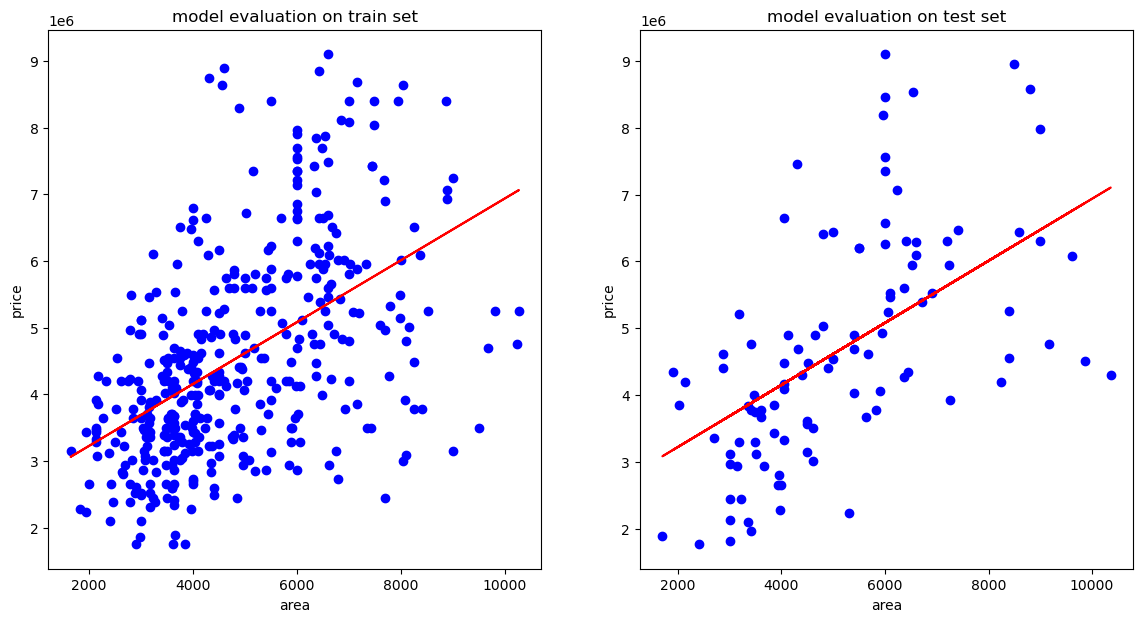

R2 linear model (train): 0.2649595520572533
MSE linear model (train): 1788348696181.8792
---------------------------
R2 linear (test): 0.3410876668094397
MSE linear (test): 1933129524837.9326


In [25]:
theta_0 = model_simple.intercept_
theta_1 = model_simple.coef_[0]

h_theta_test = theta_0 + theta_1 * X_test_scaled_area
y_hat_simple_test = model_simple.predict(X_test_scaled_area)

h_theta_train = theta_0 + theta_1 * X_train_scaled_area
y_hat_simple_train = model_simple.predict(X_train_scaled_area)

R2_simple_test = r2_score(Y_test, y_hat_simple_test)
mse_simple_test = mean_squared_error(Y_test, y_hat_simple_test)

R2_simple_train = r2_score(Y_train, y_hat_simple_train)
mse_simple_train = mean_squared_error(Y_train, y_hat_simple_train)

#visualisation
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)

plt.scatter(X_train["area"], Y_train, color = 'blue')
plt.plot(X_train["area"], h_theta_train , '-r')
plt.xlabel("area")
plt.ylabel("price")
plt.title("model evaluation on train set")

plt.subplot(1, 2, 2)

plt.scatter(X_test["area"], Y_test, color = 'blue')
plt.plot(X_test["area"], h_theta_test , '-r')
plt.xlabel("area")
plt.ylabel("price")
plt.title("model evaluation on test set")

plt.show()

print(f"R2 linear model (train): {R2_simple_train}")
print(f"MSE linear model (train): {mse_simple_train}")
print('---------------------------')
print(f"R2 linear (test): {R2_simple_test}")
print(f"MSE linear (test): {mse_simple_test}")

## 1.4 Multiple Linear Regression

In [26]:
model_muliple = linear_model.LinearRegression()
model_muliple.fit(X_train_scaled, Y_train)

LinearRegression()

In [27]:
y_hat_muliple_test = model_muliple.predict(X_test_scaled)

y_hat_muliple_train = model_muliple.predict(X_train_scaled)

R2_muliple_test = r2_score(Y_test, y_hat_muliple_test)
mse_muliple_test = mean_squared_error(Y_test, y_hat_muliple_test)

R2_muliple_train = r2_score(Y_train, y_hat_muliple_train)
mse_muliple_train = mean_squared_error(Y_train, y_hat_muliple_train)

print(f"R2 muliple model (train): {R2_muliple_train}")
print(f"MSE muliple model (train): {mse_muliple_train}")
print('---------------------------')
print(f"R2 muliple (test): {R2_muliple_test}")
print(f"MSE muliple (test): {mse_muliple_test}")

R2 muliple model (train): 0.60851095667656
MSE muliple model (train): 952490331867.4219
---------------------------
R2 muliple (test): 0.6078662100198533
MSE muliple (test): 1150449565007.5933


In [28]:
#Comparing results with the simple linear regression
print(f"R2 muliple (test): {R2_muliple_test}")
print(f"MSE muliple (test): {mse_muliple_test}")
print('---------------------------')
print(f"R2 linear (test): {R2_simple_test}")
print(f"MSE linear (test): {mse_simple_test}")

R2 muliple (test): 0.6078662100198533
MSE muliple (test): 1150449565007.5933
---------------------------
R2 linear (test): 0.3410876668094397
MSE linear (test): 1933129524837.9326


## 1.5 Polynomial Regression

$$
\Large h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^{2} \dots
$$

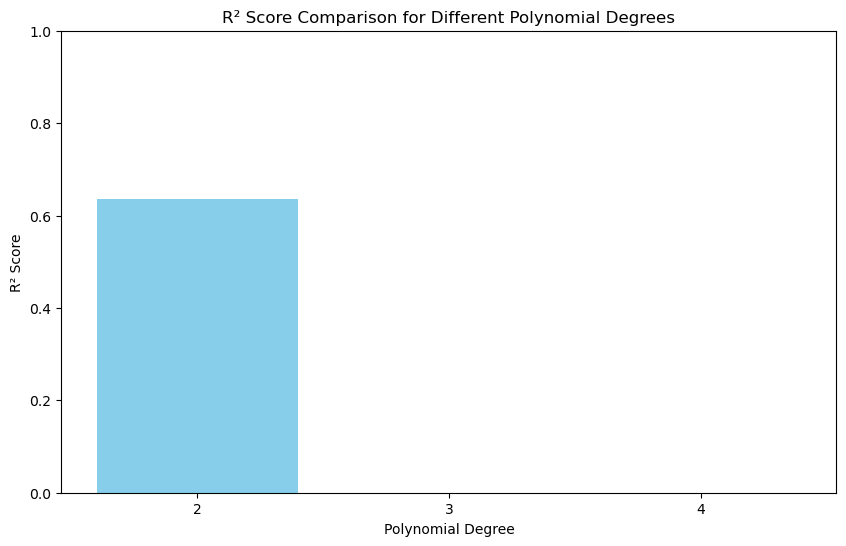

R² for Polynomial Regression (degree 2): 0.6359667035617809
R² for Polynomial Regression (degree 3): -7.290452425780112
R² for Polynomial Regression (degree 4): -836.9292347747719


In [29]:
degrees = [2, 3, 4]
r2_scores = []

for degree in degrees:
    model_poly = make_pipeline(
        PolynomialFeatures(degree=degree),
        linear_model.LinearRegression()
    )
    
    model_poly.fit(X_train_scaled, Y_train)
    y_hat_poly = model_poly.predict(X_test_scaled)
    
    R2_poly = r2_score(Y_test, y_hat_poly)
    r2_scores.append(R2_poly)


plt.figure(figsize=(10, 6))
plt.bar(degrees, r2_scores, color='skyblue')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score Comparison for Different Polynomial Degrees')
plt.xticks(degrees)  
plt.ylim(0, 1) 
plt.show()

for i in range(len(degrees)):
    print(f"R² for Polynomial Regression (degree {degrees[i]}): {r2_scores[i]}")

# 2. Logistic Regression with Classification

## 2.1 Preprocessing

[Data link](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data)

In [30]:
df = pd.read_csv("framingham.csv") 
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
df.drop(columns = "education", inplace = True) # droping unnecessary column

In [32]:
df.shape

(4238, 15)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [34]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [35]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [36]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [37]:
df.dropna(inplace = True)
df.shape

(3749, 15)

In [38]:
#Split the data into training and testing sets (e.g., 80/20)
X = df.drop(["TenYearCHD"], axis = 1)
Y = df["TenYearCHD"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

![z-score normilzation](https://miro.medium.com/v2/da:true/resize:fit:400/1*13XKCXQc7eabfZbRzkvGvA.gif)

In [39]:
#applying Standard normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.2 Modeling with Logistic Regression

$$
\Large z = \theta^T x \quad \text{where} \quad x_0 = 1
$$
$$
\Large h_{\theta}(x) = \frac{1}{1 + e^{-z}}
$$

In [40]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [41]:
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

training_acc = accuracy_score(Y_train, y_train_pred)
testing_acc = accuracy_score(Y_test, y_test_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8550
Testing accuracy :  0.8440


## 2.3 Model Evaluation

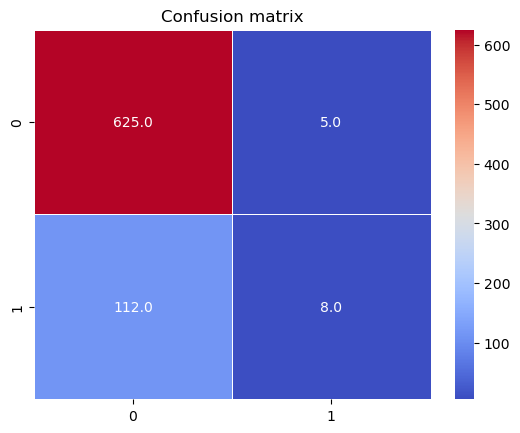

In [42]:
cf_matrix = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cf_matrix, annot = True, linewidths = 0.5, cmap='coolwarm', fmt = '0.1f')
plt.title("Confusion matrix")
plt.show()